In [5]:
import pandas as pd
import numpy as np
import sklearn
import json
import matplotlib.pyplot as plot
%matplotlib inline

In [127]:
info_file = 'user_info_with_followers.json'
with open(info_file) as f:
    users = json.load(f)
    user_info= pd.DataFrame(users)

In [128]:
user_info.head()

,created_at,description,favourites_count,followers,followers_count,friends_count,id,lang,listed_count,location,name,profile_location,screen_name,statuses_count,time_zone,utc_offset,verified
0,2013-01-04 14:14:01,recovering from anorexia. inpatient X1 .life i...,63,"[{'id': 914640710434877440, 'screen_name': 'do...",1842,536,1060558130,en,18,Wonderland,Recovery Vs Relspse,None,BrokenPurge,18326,None,None,False
1,2018-07-13 18:37:04,Tweeting all things MH & positive thoughts whi...,41,NaN,50,213,1017840348083650560,en,0,,flyingfree,None,flyingf28327022,159,None,None,False
2,2017-07-17 17:41:33,Jumping on the bandwagon of 'tweet what you ea...,31,"[{'id': 2155571449, 'screen_name': 'cocomebody...",32,185,887004356075286528,en,1,"South West, England",Emily May,None,queenofoats,22,None,None,False
3,2016-06-06 11:15:49,New TV series seeks 16-19yr olds suffering fro...,9,"[{'id': 4808641872, 'screen_name': 'shutupchri...",77,256,739777811964153856,en-gb,0,"London, England",NewEDProg,None,NewEDProg,221,None,None,False
4,2010-02-01 18:36:29,A recovering anorexic simultaneously trying to...,0,"[{'id': 967506137770840065, 'screen_name': 'Th...",4397,5661,110487555,en,108,London,msjoanna cake,None,msjoannacake,3245,None,None,False


In [160]:
from TweetPreprocessor import TweetPreprocessor

def get_support_groups_from_list(followers):
    support_groups = []
    for follower in followers:
        description, verified = TweetPreprocessor.pipeline(follower['description'].lower()), follower['verified']
        print(description)
    return support_groups

In [209]:
cols = ['description', 'verified', 'friend_id', 'associated_screen_name']
rows = []

num_users = user_info.shape[0]

for i in range(num_users):
    friends = user_info.iloc[i].followers
    screen_name = user_info.iloc[i].screen_name
    if isinstance(friends, list):
        print("{} has {} friends".format(screen_name, len(friends)))
        for friend in friends:
            # only want english speaking
            if 'en' in friend['lang']:
                description, verified = TweetPreprocessor.pipeline(friend['description'].lower()), friend['verified']
                rows.append([description, verified, friend['id'], screen_name])
            
followers_df = pd.DataFrame(rows)
followers_df.columns = cols
print("\nFound {} friends".format(followers_df.shape[0]))
followers_df.head()

BrokenPurge has 20 friends
queenofoats has 20 friends
NewEDProg has 20 friends
msjoannacake has 20 friends
elamame_bean has 20 friends
xbertyx has 20 friends
AshleyVargas731 has 20 friends
lifeoverAna has 7 friends
AdriennesAngels has 20 friends
Silencing_ED has 20 friends
AnorexiaRecover has 20 friends
RealityTweeter has 20 friends
claire_santucci has 20 friends
madison_summer has 20 friends

Found 242 friends


,description,verified,friend_id,associated_screen_name
0,yo girl struggling with eating disorder but f...,False,1039150477563363328,BrokenPurge
1,m 🌷🌷🌷🌷 neda helpline suicide lifeline ...,False,1028740646662750209,BrokenPurge
2,distoed visions of perfection tw hospitalizati...,False,2948675045,BrokenPurge
3,tweeting all things mh positive thoughts whils...,False,1017840348083650560,BrokenPurge
4,broken dreams lost childhood starving away my ...,False,1006952516188278785,BrokenPurge


In [207]:
# Try some unsupervised learning to classify the users based on description
from sklearn.cluster import KMeans, MiniBatchKMeans

n_clusters = 3

vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                                 min_df=2, stop_words='english')
X = vectorizer.fit_transform(followers_df.description)

km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
labels = km.fit_predict(X)
print("KMeans with {} clusters fit".format(n_clusters))
print(labels)
assert(len(labels) == followers_df.shape[0])
for i in range(followers_df.shape[0]):
    followers_df.loc[i, 'class'] = labels[i]
followers_df[['description', 'class']]

for i in range(n_clusters):
    class_df = followers_df[followers_df['class'] == i]
    print("=" * 20, "Class number {}: ({} users)".format(i, class_df.shape[0]), "=" * 20)
    print(class_df.head())

KMeans with 3 clusters fit
[2 0 0 0 0 0 0 0 0 0 1 2 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 2 0 0 0
 0 0 2 2 2 2 0 2 0 2 0 1 0 2 2 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 2 0 2 0
 1 0 2 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2 1 0 0 0 0
 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 2 2 1 0 0 1 0 2 0 0 0 2 1 2 1 0 0]
==================== Class number 0: (181 users) ====================
                                         description  verified  \
1  m  🌷🌷🌷🌷 neda helpline    suicide lifeline     ...     False   
2  distoed visions of perfection tw hospitalizati...     False   
3  tweeting all things mh positive thoughts whils...     False   
4  broken dreams lost childhood starving away my ...     False   
5  this is a safe place for people to have someon...     False   

             f

In [194]:
dump = user_info[['description','statuses_count', 'screen_name', 'followers']]

In [131]:
dump

,description,statuses_count,screen_name,followers
0,recovering from anorexia. inpatient X1 .life i...,18326,BrokenPurge,"[{'id': 914640710434877440, 'screen_name': 'do..."
1,Tweeting all things MH & positive thoughts whi...,159,flyingf28327022,NaN
2,Jumping on the bandwagon of 'tweet what you ea...,22,queenofoats,"[{'id': 2155571449, 'screen_name': 'cocomebody..."
3,New TV series seeks 16-19yr olds suffering fro...,221,NewEDProg,"[{'id': 4808641872, 'screen_name': 'shutupchri..."
4,A recovering anorexic simultaneously trying to...,3245,msjoannacake,"[{'id': 967506137770840065, 'screen_name': 'Th..."
5,"recovery from anorexia nervosa,depression and ...",17,elamame_bean,"[{'id': 388307112, 'screen_name': 'KayBirchall..."
6,"Buddhist, recovering anorexic, 18yr old girl l...",12279,xbertyx,"[{'id': 2767908833, 'screen_name': 'colin_kenn..."
7,Recovering from Anorexia. Love God. Love my hu...,80,AshleyVargas731,"[{'id': 20178195, 'screen_name': 'lifewithahme..."
8,22. Depression. Anxiey. BDD. Recovering Anorex...,73,lifeoverAna,"[{'id': 4291039753, 'screen_name': 'SCSobrComp..."
9,I am a recovering anorexic (by the grace of co...,35,AdriennesAngels,"[{'id': 2166028999, 'screen_name': 'ABeck0417'..."


In [124]:
tweet_file = 'user_tweets_latest.jsonl'
tweet_train = []
with open(tweet_file) as fp:
    for line in fp.readlines():
        tweet_train.append(json.loads(line))

In [125]:
tweets = pd.DataFrame(tweet_train)

In [126]:
tweets.head()

,entities,id,in_reply_to_status_id,in_reply_to_user_id,text,truncated,tweeter_id,tweeter_screen_name
0,"{'hashtags': [{'text': 'vegan', 'indices': [36...",900758943361900544,NaN,NaN,Beautiful bowl of fruity goodness!! #vegan #wh...,False,887004356075286528,queenofoats
1,"{'hashtags': [], 'symbols': [], 'user_mentions...",896790043867594754,NaN,NaN,RT @HopeVirgo: Anorexia sometimes shouts at me...,False,887004356075286528,queenofoats
2,"{'hashtags': [], 'symbols': [], 'user_mentions...",895311781404475392,8.953117e+17,8.937794e+17,@imgoingvegan No problem!,False,887004356075286528,queenofoats
3,"{'hashtags': [{'text': 'breakfast', 'indices':...",893045089282519040,NaN,NaN,I do love me some passionfruit 💕 #breakfast #w...,False,887004356075286528,queenofoats
4,"{'hashtags': [{'text': 'vegan', 'indices': [57...",892384680485543936,NaN,NaN,Food shopping vegan style 🙌❤️🙌 Big love to @Be...,False,887004356075286528,queenofoats


In [20]:
# TODO: Classify the users as having a support group or not

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from imp import reload
import TweetPreprocessor
reload(TweetPreprocessor)
from TweetPreprocessor import TweetPreprocessor 

analyser = SentimentIntensityAnalyzer()

def analyse_sentiment(tweeter, preprocess=False):
    for i in range(0, tweeter.shape[0]):
        text = tweeter.iloc[i].text
        np_score = analyser.polarity_scores(text)
        
        preprocessed_text = TweetPreprocessor.pipeline(text)
        score = analyser.polarity_scores(preprocessed_text)
        
        tweeter.loc[i, 'processed_text'] = preprocessed_text
        
        tweeter.loc[i, 'compound'] = score['compound']
        tweeter.loc[i, 'pos'] = score['pos']
        tweeter.loc[i, 'neg'] = score['neg']
        tweeter.loc[i, 'neu'] = score['neu']
        
        tweeter.loc[i, 'compound_np'] = np_score['compound']
        tweeter.loc[i, 'pos_np'] = np_score['pos']
        tweeter.loc[i, 'neg_np'] = np_score['neg']
        tweeter.loc[i, 'neu_np'] = np_score['neu']      
    return tweeter

[nltk_data] Downloading package wordnet to /Users/jtsui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
tweets.shape

(13564, 18)

In [51]:
analysed_users = analyse_sentiment(pd.DataFrame(tweets))

In [52]:
analysed_users['processed_text'].head()


0    beautiful bowl of fruity goodness vegan whatve...
1     anorexia sometimes shouts at me that if i bef...
2                                           no problem
3    i do love me some passionfruit 💕 breakfast wha...
4    food shopping vegan style 🙌❤️🙌 big love to veg...
Name: processed_text, dtype: object

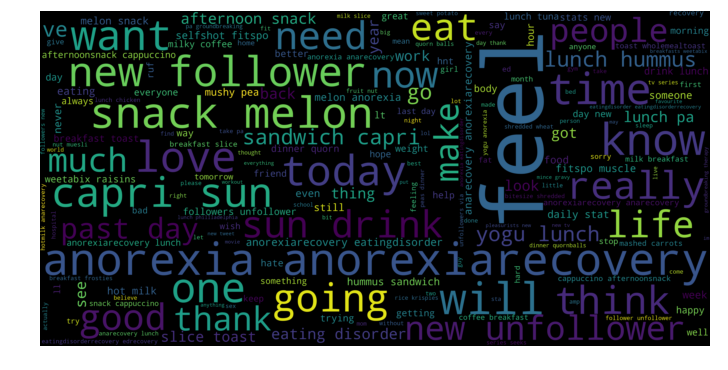

In [53]:
from wordcloud import WordCloud
wordcloud_string = ''
for i in range(analysed_users.shape[0]):
    wordcloud_string += analysed_users.iloc[i].processed_text

wordcloud = WordCloud(width=4000, height=2000,max_font_size=500).generate(wordcloud_string)
plot.figure(figsize=(12,10))
plot.imshow(wordcloud, interpolation="bilinear")
plot.axis("off")
plot.show()

In [57]:
# Do some topic modeling 

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
tfidf_result = vec.fit_transform(analysed_users.processed_text)
feature_names = vec.get_feature_names()

tfidf_result.shape

(13564, 10978)

In [91]:
def top_n(tfidf_result, feature_names, top=100):
        if feature_names is None or tfidf_result is None:
            return

        scores = zip(feature_names,
                     np.asarray(tfidf_result.sum(axis=0)).ravel())

        sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

        labels, scores = [], []

        # Get the scores and labels of the top 100 tweets
        for item in sorted_scores[:top]:
            print("{0:50} Score: {1}".format(item[0], item[1]))
            # sns.distplot(item[1], label=item[0])
            labels.append(item[0])
            scores.append(item[1])

        index = np.arange(len(scores))
        plot.bar(index, scores, figure=plot.figure(figsize=(25, 10)))
        plot.xlabel('Word', fontsize=24)
        plot.ylabel('TFIDF Score', fontsize=24)
        plot.xticks(index, labels, fontsize=12, rotation=90)
        plot.title('Top {} features'.format(top))
        plot.savefig('Top_{}'.format(top))

news                                               Score: 282.4995237113288
new                                                Score: 263.73480256214054
lunch                                              Score: 230.65647152607553
dinner                                             Score: 197.33487783672737
breakfast                                          Score: 185.08094196222268
day                                                Score: 180.5033378026636
anorexia                                           Score: 149.4662802222218
snack                                              Score: 146.70515657094788
just                                               Score: 140.58083114644515
thank                                              Score: 133.0014835697542
anorexiarecovery                                   Score: 123.08258698653853
anarecovery                                        Score: 121.36645562699516
pleasurists                                        Score: 118.1438454080942
like

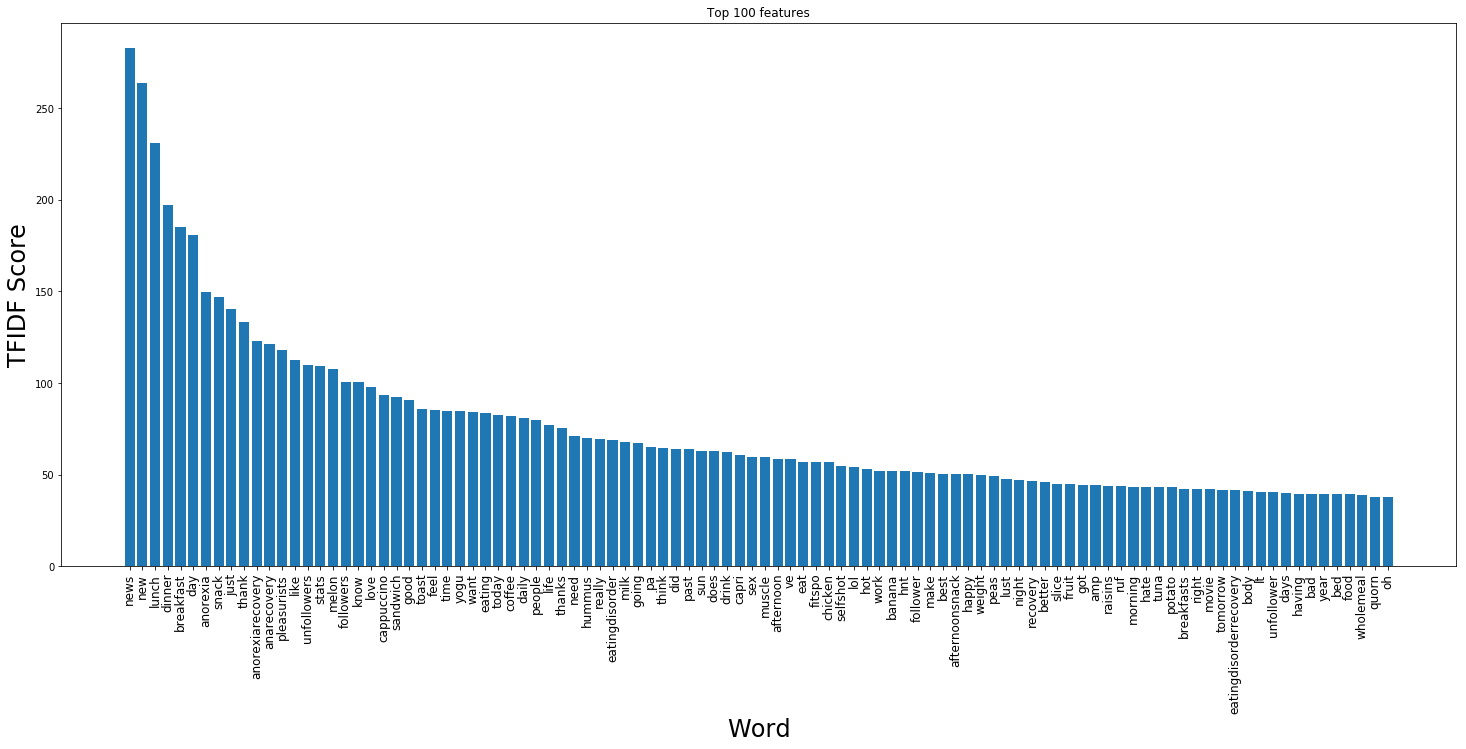

In [92]:
top_n(tfidf_result, feature_names, top=100)

In [107]:
# Topic Modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

num_topics = 10

lda_model = LatentDirichletAllocation(n_topics=num_topics, max_iter=10, learning_method='online')
lda_Z = lda_model.fit_transform(tfidf_result)
print('LDA shape: ')
print(lda_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Build a Non-Negative Matrix Factorization Model
nmf_model = NMF(n_components=num_topics)
nmf_Z = nmf_model.fit_transform(tfidf_result)
print('NMF shape: ')
print(nmf_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Build a Latent Semantic Indexing Model
lsi_model = TruncatedSVD(n_components=num_topics)
lsi_Z = lsi_model.fit_transform(tfidf_result)
print('LSI shape: ')
print(lsi_Z.shape)  # (NO_DOCUMENTS, NO_TOPICS)


/Users/jtsui/.local/share/virtualenvs/detectAna-gf5TNXCz/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LDA shape: 
(13564, 10)
NMF shape: 
(13564, 10)
LSI shape: 
(13564, 10)


In [108]:
def print_topics(model, top_n=10):
        for idx, topic in enumerate(model.components_):
            print("Topic %d:" % (idx))
            print([(vec.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]])

In [109]:
# Let's see how the first document in the corpus looks like in different topic spaces
print("LDA Model:")
print_topics(lda_model)
print("=" * 20)

print("NMF Model:")
print_topics(nmf_model)
print("=" * 20)

print("LSI Model:")
print_topics(lsi_model)
print("=" * 20)

LDA Model:
Topic 0:
[('life', 83.766261155685186), ('hot', 58.71419894144374), ('disorder', 42.077777276143664), ('best', 37.943554178727993), ('doing', 36.199882414842769), ('care', 35.634197198837079), ('news', 27.264086130814533), ('mean', 25.26656402432517), ('wrong', 25.004860325757665), ('just', 21.69521172350527)]
Topic 1:
[('melon', 110.77520099943069), ('anorexia', 96.776853081289332), ('toast', 91.470995500482061), ('love', 74.410771557598295), ('sun', 66.434465338428311), ('dinner', 63.242523185318554), ('anarecovery', 63.148202193985398), ('feel', 59.739879224607073), ('weight', 55.027700056572044), ('going', 47.808603808053519)]
Topic 2:
[('drink', 66.333705880330612), ('like', 61.456811617530221), ('thanks', 61.189501322728184), ('stop', 38.96143278258927), ('hnt', 38.013359718923709), ('feel', 34.464250400004204), ('help', 33.841591512664969), ('honey', 33.193040291733155), ('ok', 27.919333867497798), ('lost', 27.272301203307293)]
Topic 3:
[('day', 167.777111059958), ('s

In [93]:
# Build a model to classify this later
analysed_users['is_support'] = "No"
analysed_users.loc[analysed_users['tweeter_screen_name'] == "lilglacevanille", 'is_support'] = "Yes"
analysed_users.loc[analysed_users['tweeter_screen_name'] == "ItsKalaNoY", 'is_support'] = "Yes"
analysed_users.loc[analysed_users['tweeter_screen_name'] == "AmandaGrundle", 'is_support'] = "Yes"
analysed_users.loc[analysed_users['tweeter_screen_name'] == "earthtoree", 'is_support'] = "Yes"
analysed_users.loc[analysed_users['tweeter_screen_name'] == "HanBaNannz", 'is_support'] = "Yes"

In [26]:
yays = analysed_users[analysed_users.is_support=='Yes']
yays.reset_index(inplace=True)
yays_i = np.random.choice(yays.shape[0],2000)
df1 = yays.loc[yays_i]

nays = analysed_users[analysed_users.is_support=='No']
nays.reset_index(inplace=True)
nays_i = np.random.choice(nays.shape[0],2000)
df2 = nays.loc[nays_i]


ValueError: a must be greater than 0

In [ ]:
pd.concat([df1,df2])

In [ ]:
nays

In [ ]:
analysed_users.shape

In [ ]:
analysed_users.loc[ (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].hist(bins=15, by=analysed_users['is_support'],figsize=(15,5), sharex=True, sharey=True)
analysed_users[['pos_np','pos']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)
analysed_users[['neg_np','neg']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)
analysed_users[['neu_np','neu']].hist(bins=15, by=analysed_users['is_support'], figsize=(15,6), sharex=True, sharey=True)


In [ ]:
np.unique(analysed_users.is_support, return_counts=True)

In [ ]:
analysed_users[analysed_users.id==1045461843739734016]

In [ ]:
analysed_users.loc[[0,1]]

In [ ]:
cols = ['compound', 'pos', 'neg', 'neu']
cols_np = ['compound_np', 'pos_np', 'neg_np', 'neu_np']

In [ ]:
analysed_users.shape

In [ ]:
analysed_users[analysed_users['is_support'] =='Yes'][cols].describe()

In [ ]:
analysed_users[analysed_users['is_support'] =='No'][cols].describe()


In [ ]:
analysed_users.loc[(analysed_users['is_support'] =='Yes') & (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].describe()

In [ ]:
analysed_users.loc[(analysed_users['is_support'] =='No') & (analysed_users['compound_np'] !=0) & (analysed_users['compound'] !=0) ][['compound_np','compound']].describe()